In [153]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from pprint import pprint

In [154]:
str_filename = '328_sales.csv'
str_filename2 = '328_mint.csv'

In [155]:
fh = open(str_filename)
csv_reader = csv.reader(fh)
fh_mint = open(str_filename2)
csv_reader2 = csv.reader(fh_mint)
fh_temp = open('temp.csv', 'w')

In [156]:
writer = csv.writer(fh_temp, delimiter=',')
writer.writerow( ['ID'] + next(csv_reader2))
writer.writerows([i] + row for i, row in enumerate(csv_reader2, 1))

In [157]:
fh_temp.close()
fh_temp = open('temp.csv', "rt")
csv_reader_temp = csv.reader(fh_temp)
csv_header = next(csv_reader)
csv_header2 = next(csv_reader_temp)
csv_header2.append('temp')

In [158]:
fh.close()
fh_mint.close()
fh_temp.close()

In [159]:
df_sig = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
df_sig
df_sig2 = pd.read_csv('temp.csv', header=None, skiprows=1, names=csv_header2)
i = 0
for row in df_sig['block_time']:
    row = row.replace('+00:00', '')
    row = row.replace('T', ' ')
    df_sig.at[i, 'block_time'] = row
    i += 1
df_sig2

,ID,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $1738.07/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method,temp
0,1,0x800d967a9f316b4061c827ec4d86fa16a4bcbb4c9f1d...,15044333,1656494917,2022-06-29 09:28:37,0xe1994b2fd8310218a06875b4b3d7cbca8ec83e4c,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.100000,0,173.807000,0.008537,14.837989,1098.71,NaN,NaN,Purchase,NaN
1,2,0x33ff688968832f63a313971027faa3a50641267a4918...,15045311,1656510412,2022-06-29 13:46:52,0x4bed1d532b7c7bd148eb43c8473dca3685fd271d,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.000000,0,0.000000,0.005652,9.823280,1098.71,NaN,NaN,Set Auction Details,NaN
2,3,0xf36c86367d69081af42ada591ea259b6743e9332980c...,15046032,1656522724,2022-06-29 17:12:04,0x6414258ee299b740c19a11b938afe30a373d1afd,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.508889,0,4360.624511,0.019247,33.452098,1098.71,NaN,NaN,Purchase,NaN
3,4,0xaf8df7fcdb0feaa313c834d54dd6f416a867bb98e931...,15046042,1656522949,2022-06-29 17:15:49,0x5a77b2d05afb67eacd8f9c7e98692dd1e2883cb3,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.024444,0,3518.626156,0.023384,40.643090,1098.71,NaN,NaN,Purchase,NaN
4,5,0x011cca29a5437871f072d40d2c5237a03a8a2649a071...,15046045,1656522962,2022-06-29 17:16:02,0x4a9c2b7204570c8272ea72933176d4d591b08424,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,2.046667,0,3557.249933,0.019231,33.424259,1098.71,NaN,NaN,Purchase,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,0x40a02f602be5cedab3eea91098e0979973487907aa07...,15048046,1656554674,2022-06-30 02:04:34,0x25cce02e6339fb00ba362dc81cd1a5d7f0ad13d0,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.100000,0,173.807000,0.019112,33.217736,1069.53,NaN,NaN,Purchase,NaN
590,591,0x6baca26bb0f5a3b45a8dcd4d19580606a8e01b88def2...,15048845,1656567609,2022-06-30 05:40:09,0x83ad63ed81c72b44efbd7f079179b444ea6dd09c,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.100000,0,173.807000,0.018822,32.714188,1069.53,NaN,NaN,Purchase,NaN
591,592,0xf0eb574f6fdcff8319c12540c9e6549f82127b7ce816...,15048944,1656569102,2022-06-30 06:05:02,0x83ad63ed81c72b44efbd7f079179b444ea6dd09c,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.100000,0,173.807000,0.017640,30.659922,1069.53,NaN,NaN,Purchase,NaN
592,593,0xaa47764a9fb82a4f0e92b9142c13d11dd53c8481b8d0...,15051222,1656605152,2022-06-30 16:05:52,0x4dd270eb3e0c6bd5900d4e88f254c55b99786510,0xd94c7060808f3c876824e57e685702f3834d2e13,NaN,0.100000,0,173.807000,0.022708,39.467355,1069.53,NaN,NaN,Purchase,NaN


In [162]:
df_sig['Date'] = df_sig['block_time'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df_sig['Date']
df_sig2['Date'] = df_sig2['DateTime'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
print(df_sig2)

      ID                                             Txhash   Blockno  \
0      1  0x800d967a9f316b4061c827ec4d86fa16a4bcbb4c9f1d...  15044333   
1      2  0x33ff688968832f63a313971027faa3a50641267a4918...  15045311   
2      3  0xf36c86367d69081af42ada591ea259b6743e9332980c...  15046032   
3      4  0xaf8df7fcdb0feaa313c834d54dd6f416a867bb98e931...  15046042   
4      5  0x011cca29a5437871f072d40d2c5237a03a8a2649a071...  15046045   
..   ...                                                ...       ...   
589  590  0x40a02f602be5cedab3eea91098e0979973487907aa07...  15048046   
590  591  0x6baca26bb0f5a3b45a8dcd4d19580606a8e01b88def2...  15048845   
591  592  0xf0eb574f6fdcff8319c12540c9e6549f82127b7ce816...  15048944   
592  593  0xaa47764a9fb82a4f0e92b9142c13d11dd53c8481b8d0...  15051222   
593  594  0xa2367abcd1d31229b400ad3f934a93e5133e56ba6346...  15051256   

     UnixTimestamp             DateTime  \
0       1656494917  2022-06-29 09:28:37   
1       1656510412  2022-06-29 13:46:

In [165]:
mintStart = datetime.strptime("2022-06-29 17:00:00", '%Y-%m-%d %H:%M:%S')
endDate = datetime.strptime("2022-07-01 17:00:00", '%Y-%m-%d %H:%M:%S')
collection_size = 399
df_new=df_sig.loc[(df_sig['Date'] <= endDate)]
df_new=df_new.loc[(df_sig['Date'] >= mintStart)]
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['constant'] = 1
df_new = df_new.set_index('Date')
df_new = df_new.resample('30T').sum()
df_new

,eth_price,usd_price,constant
Date,,,
2022-06-29 17:30:00,190.65,208544.562504,85
2022-06-29 18:00:00,55.36,61190.186152,21
2022-06-29 18:30:00,65.71,72502.630208,29
2022-06-29 19:00:00,48.02,53105.177196,11
2022-06-29 19:30:00,14.90,16514.893000,6
...,...,...,...
2022-07-01 13:00:00,1.50,1578.450000,1
2022-07-01 13:30:00,0.00,0.000000,0
2022-07-01 14:00:00,0.00,0.000000,0


final mint price:
0.9361111111111112
first mint price - final mint price:
1.5727777777777776


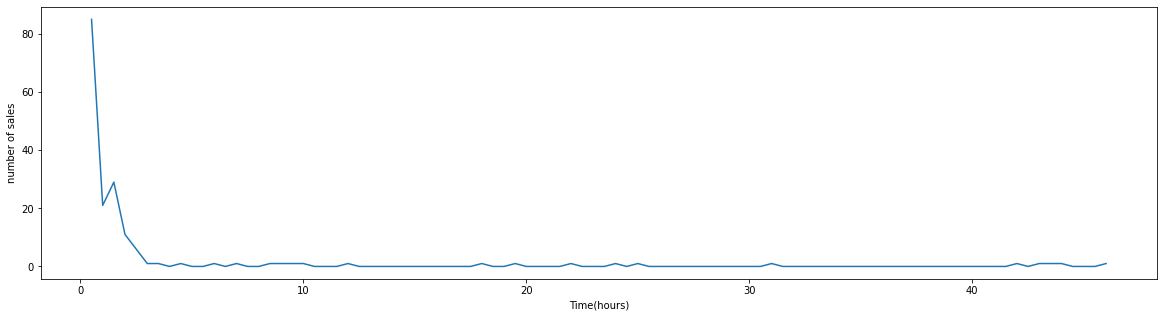

In [166]:
df_sig2 = df_sig2.loc[(df_sig2['Date'] >= mintStart)]
df_sig2 = df_sig2.loc[(df_sig2['ErrCode'] != 'execution reverted')]
final_mint_price = df_sig2['Value_IN(ETH)']
x = df_new.index
x = x - mintStart
x = x.total_seconds() / 3600
z = df_new['constant']
plt.xlabel('Time(hours)')
plt.ylabel('number of sales')
plt.rcParams["figure.figsize"] = (20,5)
print("final mint price:")
print (final_mint_price[collection_size])
print("first mint price - final mint price:")
print(final_mint_price.iloc[0] - final_mint_price[collection_size])
plt.plot(x,z)